# SC1015 Project Team 2
> by SCSE Chen Yi, SCSE Gong Zerui, SCSE Zeng Xunyi

### Import  Essential Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

from collections import Counter

### Import training dataset

In [4]:
df_train = pd.read_csv("source/train.csv")
df_test = pd.read_csv("source/test.csv")
df_total = pd.concat([df_train, df_test])
df_total.head(100)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.327317,-0.022256,-0.149144,-0.248645,0.133229,-0.179547,-0.306979,0.113994,-0.159712,-0.114953,...,-0.422166,-0.438911,-0.710035,0.121018,-0.023408,-0.769477,0.256167,0.038575,1,WALKING
96,0.349059,-0.022004,-0.150052,-0.303125,0.152607,-0.174298,-0.356618,0.106512,-0.141309,-0.178067,...,-0.493845,-0.538717,0.833201,0.457682,0.211527,-0.776736,0.251406,0.036180,1,WALKING
97,0.264682,-0.008592,-0.102974,-0.363238,0.036867,-0.244159,-0.425625,-0.055041,-0.243230,-0.278328,...,-0.569276,0.460655,0.765162,0.424757,0.167463,-0.786963,0.244471,0.034677,1,WALKING
98,0.284317,-0.027206,-0.212303,-0.183444,0.141076,-0.225689,-0.249080,0.110614,-0.221009,0.032522,...,-0.551872,-0.053158,0.512810,-0.811518,0.581624,-0.764185,0.260565,0.031442,1,WALKING


In [5]:
print("Data dims: ", df_total.shape)

Data dims:  (10299, 563)


In [6]:
print(df_total.dtypes)

tBodyAcc-mean()-X       float64
tBodyAcc-mean()-Y       float64
tBodyAcc-mean()-Z       float64
tBodyAcc-std()-X        float64
tBodyAcc-std()-Y        float64
                         ...   
angle(X,gravityMean)    float64
angle(Y,gravityMean)    float64
angle(Z,gravityMean)    float64
subject                   int64
Activity                 object
Length: 563, dtype: object


In [7]:
df_total.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,...,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,0.274347,-0.017743,-0.108925,-0.607784,-0.510191,-0.613064,-0.633593,-0.525697,-0.614989,-0.466732,...,-0.298592,-0.617700,0.007705,0.002648,0.017683,-0.009219,-0.496522,0.063255,-0.054284,16.146422
std,0.067628,0.037128,0.053033,0.438694,0.500240,0.403657,0.413333,0.484201,0.399034,0.538707,...,0.320199,0.308796,0.336591,0.447364,0.616188,0.484770,0.511158,0.305468,0.268898,8.679067
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262625,-0.024902,-0.121019,-0.992360,-0.976990,-0.979137,-0.993293,-0.977017,-0.979064,-0.935788,...,-0.536174,-0.841847,-0.124694,-0.287031,-0.493108,-0.389041,-0.817288,0.002151,-0.131880,9.000000
50%,0.277174,-0.017162,-0.108596,-0.943030,-0.835032,-0.850773,-0.948244,-0.843670,-0.845068,-0.874825,...,-0.335160,-0.703402,0.008146,0.007668,0.017192,-0.007186,-0.715631,0.182028,-0.003882,17.000000
75%,0.288354,-0.010625,-0.097589,-0.250293,-0.057336,-0.278737,-0.302033,-0.087405,-0.288149,-0.014641,...,-0.113167,-0.487981,0.149005,0.291490,0.536137,0.365996,-0.521503,0.250790,0.102970,24.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000


# Step 1: Data Cleaning

### a. Check for Duplicates

In [8]:
print('No of duplicates in the dataset: {}'.format(sum(df_total.duplicated())))

No of duplicates in the dataset: 0


### b. Check for NaN or Null value

In [9]:
print('We have {} NaN/Null values in the dataset'.format(df_total.isnull().values.sum()))

We have 0 NaN/Null values in the dataset


### c. Check for data imbalance

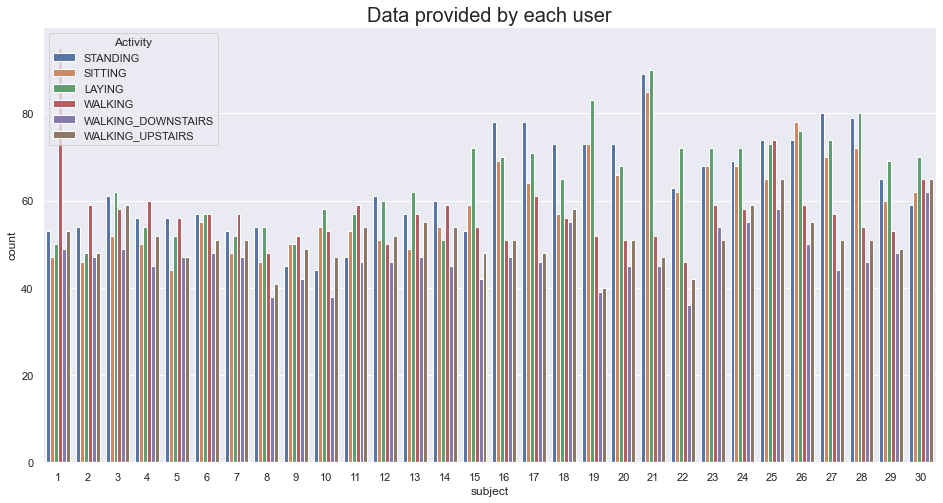

In [10]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sb.countplot(x='subject',hue='Activity', data = df_total)
plt.show()

C:\Users\Nomla\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


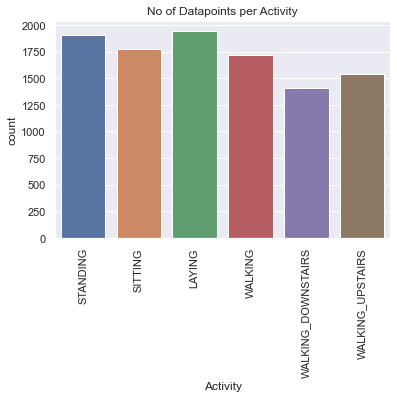

In [11]:
plt.title('No of Datapoints per Activity',fontsize=12)
sb.countplot(df_total.Activity)
plt.xticks(rotation=90)
plt.show()

Our dataset is balanced.

# Step 2:  Explore the Dataset (EDA)

### Description

This dataset is collected from 30 persons(referred as subjects in this dataset), performing different activities with a smartphone to their waists. The data is recorded with the help of sensors (accelerometer and Gyroscope (陀螺仪)) in that smartphone.
> prefix 't' in those metrics denotes time.

> suffix 'XYZ' represents 3-axial signals in X , Y, and Z directions.

> 'f' denotes frequency

> In physics, jerk is the rate at which an object's acceleration changes with respect to time. It is a vector quantity (having both magnitude and direction). Jerk is most commonly denoted by the symbol j and expressed in m/s^3 (SI units) or standard gravities per second (g_0/s).

### Acitivities of human in the Dataset

Number of Activities:  6
LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64


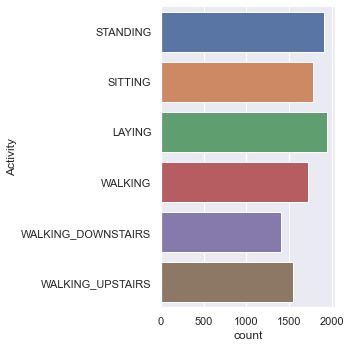

In [12]:
print("Number of Activities: ", len(df_total["Activity"].unique()))
print(df_total["Activity"].value_counts())
sb.catplot(y = "Activity", data = df_total, kind = "count")

### Subjects in Dataset (需要吗？)

Number of subjects:  30
25    409
21    408
26    392
30    383
28    382
24    381
27    376
23    372
17    368
16    366
18    364
19    360
20    354
1     347
29    344
3     341
15    328
13    327
6     325
14    323
22    321
12    320
4     317
11    316
7     308
5     302
2     302
10    294
9     288
8     281
Name: subject, dtype: int64


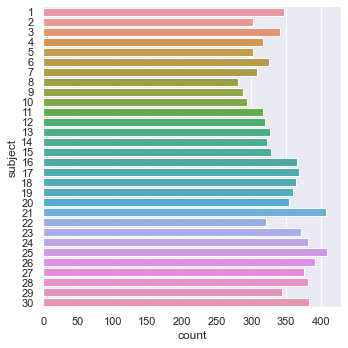

In [13]:
print("Number of subjects: ", len(df_total["subject"].unique()))
print(df_total["subject"].value_counts())
sb.catplot(y = "subject", data = df_total, kind = "count")

### Features Exploration

In [26]:
# Group and count main names of columns
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] 
for col in df_total.columns]), orient='index').rename(columns=
{0:'count'}).sort_values('count', ascending=False)

,count
fBodyAccJerk,79
fBodyAcc,79
fBodyGyro,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


### TSNE visualization of the data

C:\Users\Nomla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

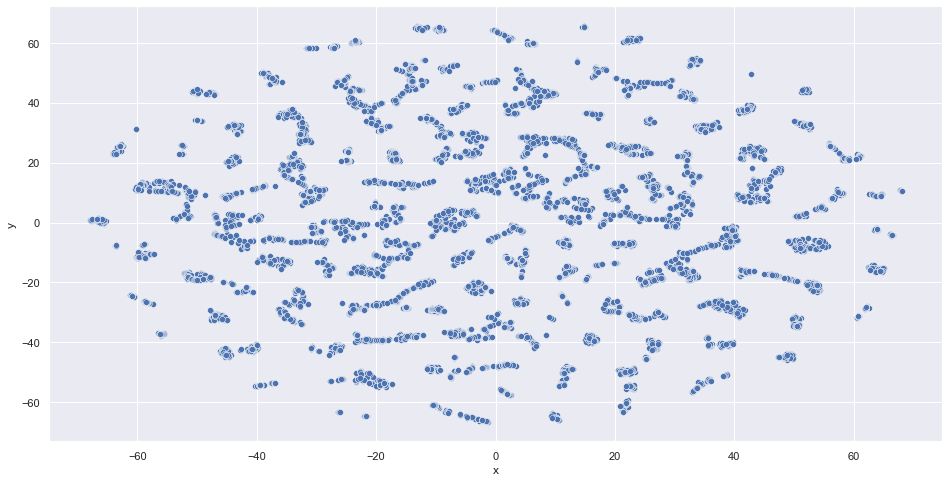

In [24]:
# drop all non-numeric data
non_numeric = ["subject", "Activity"]
df_numeric = df_total.drop(non_numeric, axis=1)

# TSNE fitting
from sklearn.manifold import TSNE

m = TSNE(learning_rate=50)
tsne_features = m.fit_transform(df_numeric)
tsne_features[1:4:, :]
df_total["x"] = tsne_features[:, 0]
df_total["y"] = tsne_features[:, 1]

# plot using seaborn
plt.figure(figsize=(16,8))
sb.scatterplot(x="x", y="y", data=df_total)


<AxesSubplot:xlabel='x', ylabel='y'>

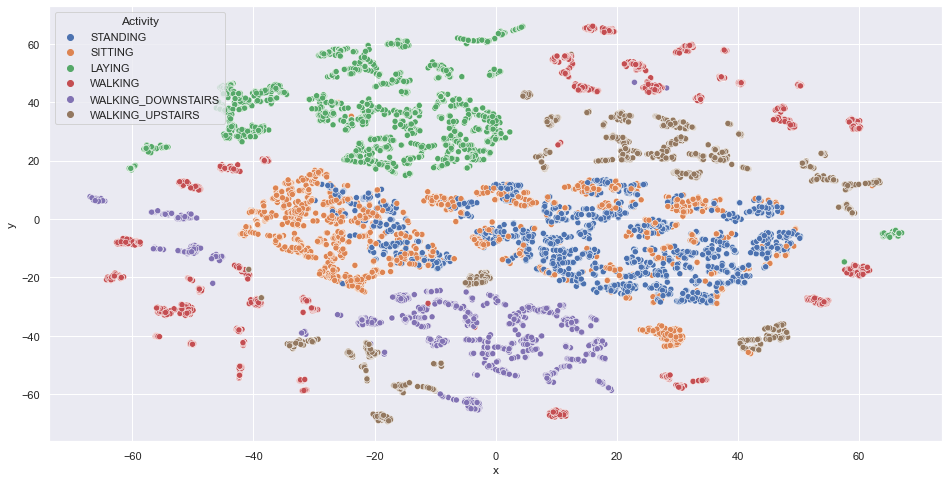

In [23]:
plt.figure(figsize=(16,8))
sb.scatterplot(x="x", y="y", hue="Activity", data=df_total)

<AxesSubplot:xlabel='x', ylabel='y'>

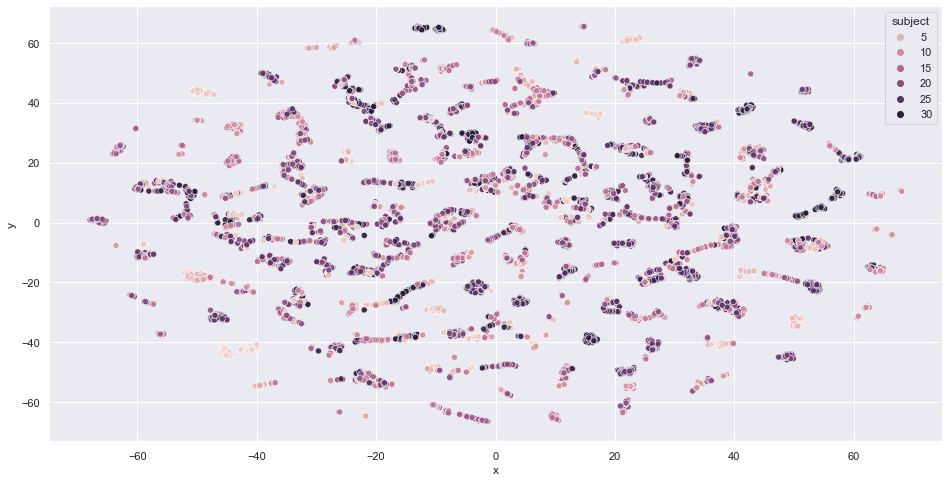

In [25]:
plt.figure(figsize=(16,8))
sb.scatterplot(x='x', y='y', hue = 'subject', data = df_total)